# Step 1: Load the dataset

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

iris_data = pd.read_csv('/content/Iris.csv')

## Step 2: Split the dataset into training and testing sets

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_data.drop('Species', axis=1), iris_data['Species'], test_size=0.2, random_state=42)

## Step 3: Create a machine learning model

In [6]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)

## Step 4: Train the model


In [7]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

## Step 5: Test the model

In [8]:
y_pred = knn_model.predict(X_test)

## Step 6: Visualize the model performance

In [11]:
def plot_decision_boundary(X, y, model, title):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    h = 0.02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)
    plt.show()

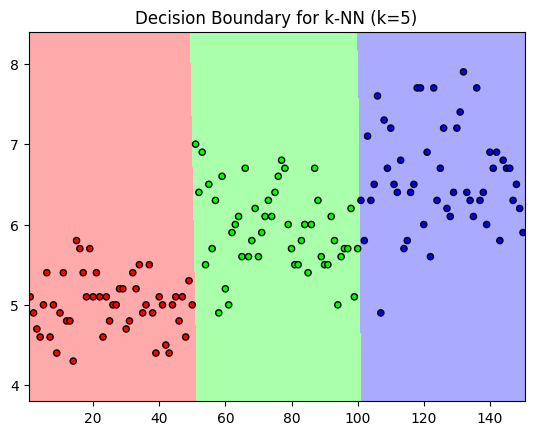

In [16]:
from sklearn.preprocessing import LabelEncoder

X_train = iris_data.drop('Species', axis=1).values[:, :2]  # Use only the first two features for visualization
y_train = iris_data['Species'].values
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train_encoded)
plot_decision_boundary(X_train, y_train_encoded, knn_model, "Decision Boundary for k-NN (k=5)")



## Step 7: Evaluate the model performance

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='weighted'))
print('Recall:', recall_score(y_test, y_pred, average='weighted'))
print('F1 score:', f1_score(y_test, y_pred, average='weighted'))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0
